<a href="https://colab.research.google.com/github/AnaRian7/CODSOFT/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Data Collection and Preprocessing

In [ ]:
#Load the data into Dataframe
iris = pd.read_csv('/content/IRIS.csv')

**Printing 1st 10 rows and last 10 rows**

In [ ]:
#First 10 rows
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#Last 10 rows
iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Number of rows and columns**

In [ ]:
iris.shape

(150, 5)

**Checking for null values**

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


#Data Visualization


Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

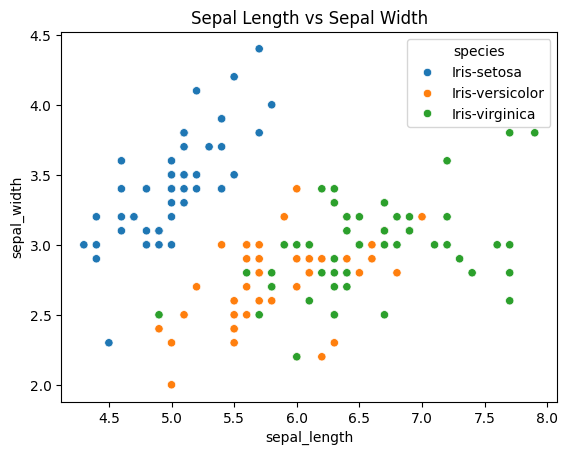

In [ ]:
# Sepal = leaf structure
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width')

Text(0.5, 1.0, 'Petal Length vs Petal Width')

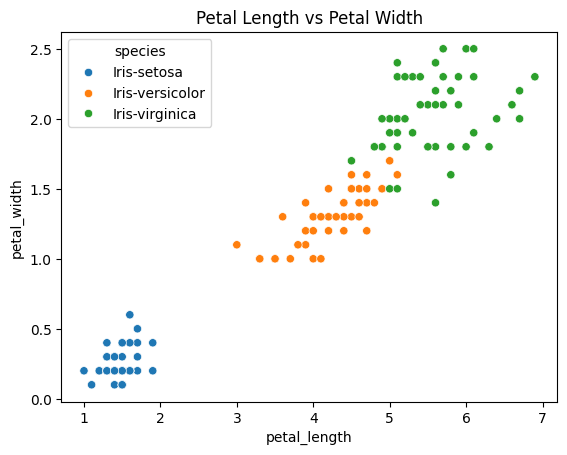

In [ ]:
#Petal = Flower Structure
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.title('Petal Length vs Petal Width')

**Correlation Coefficient**

In [ ]:
iris['species'] = iris['species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
type(iris.corr())

pandas.core.frame.DataFrame

In [ ]:
iris.corr()['species']

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [ ]:
iris.corr()['species'].drop('species')

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
Name: species, dtype: float64

Conclusion - The petal length and petal width have a stronger dependency on species compared to sepal length and sepal width.

In [ ]:
iris_df = iris.drop(columns='sepal_width', axis=1)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

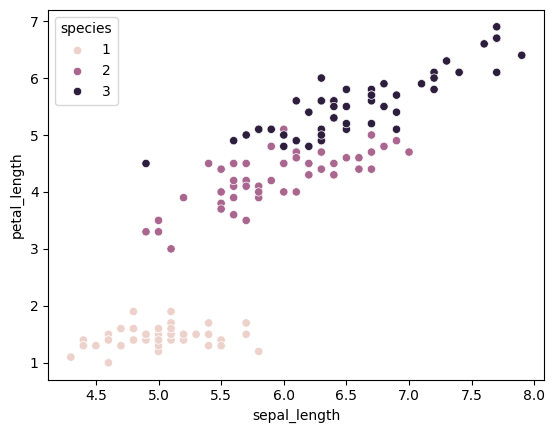

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species')

In [ ]:
iris_df.head(10)

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1
5,5.4,1.7,0.4,1
6,4.6,1.4,0.3,1
7,5.0,1.5,0.2,1
8,4.4,1.4,0.2,1
9,4.9,1.5,0.1,1


# Model Building

In [ ]:
X = iris_df.drop(columns='species', axis=1)
y = iris_df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2, stratify=y)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(135, 3) (15, 3) (135,) (15,)


**Logistic Regression**

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

**Accuracy Score Prediction using Logistic regression.**

In [ ]:
y_train_logistic_predicted = logistic_model.predict(X_train)
acc1 = accuracy_score(y_train, y_train_logistic_predicted)
acc1

0.9703703703703703

In [ ]:
y_test_logistic_predicted = logistic_model.predict(X_test)
acc2 = accuracy_score(y_test, y_test_logistic_predicted)
acc2

1.0

**Decision Tree**

In [ ]:
decision_model = DecisionTreeClassifier()

In [ ]:
decision_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Accuracy Score Prediction using Decision Tree**

In [ ]:
y_train_tree_predicted = decision_model.predict(X_train)
acc3 = accuracy_score(y_train, y_train_tree_predicted)
acc3

1.0

In [ ]:
y_test_tree_predicted = decision_model.predict(X_test)
acc4 = accuracy_score(y_test, y_test_tree_predicted)
acc4

1.0